In [ ]:

import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

from sklearn.decomposition import TruncatedSVD
from gensim import corpora, models
import gensim

from gensim.models.ldamodel import LdaModel

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import matplotlib.colors as mcolors
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes

In [ ]:
dataset=pd.read_csv("tweet_emotions.csv")
data = pd.DataFrame(dataset)

In [ ]:
data.head()

AttributeError: ignored

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

In [ ]:
data.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

**Preprocessing**

In [ ]:
def preprocess_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text.lower())
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    preprocessed_text=" ".join(tokens)
    return preprocessed_text

In [ ]:
data['preprocessed_text']=data['content'].apply(preprocess_text)
data.head()

AttributeError: ignored

     tweet_id  ...                                  preprocessed_text
0  1956967341  ...  tiffanylue know listenin habit earlier started...
1  1956967666  ...                  layin headache ughhhh waitin call
2  1956967696  ...                     funeral ceremony gloomy friday
3  1956967789  ...                              want hang friend soon
4  1956968416  ...    dannycastillo want trade someone houston ticket

[5 rows x 4 columns]

In [ ]:
data.drop(['content'],axis=1,inplace=True)

In [ ]:
data.head()

AttributeError: ignored

     tweet_id   sentiment                                  preprocessed_text
0  1956967341       empty  tiffanylue know listenin habit earlier started...
1  1956967666     sadness                  layin headache ughhhh waitin call
2  1956967696     sadness                     funeral ceremony gloomy friday
3  1956967789  enthusiasm                              want hang friend soon
4  1956968416     neutral    dannycastillo want trade someone houston ticket

**TF IDF vectorisation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=500)
vect_text=vect.fit_transform(data['preprocessed_text'])
print(vect.get_feature_names_out())

['30' 'able' 'account' 'actually' 'afternoon' 'agree' 'almost' 'alone'
 'already' 'also' 'always' 'amazing' 'another' 'anymore' 'anyone'
 'anything' 'anyway' 'around' 'asleep' 'awake' 'away' 'awesome' 'awww'
 'babe' 'baby' 'back' 'bank' 'beach' 'beautiful' 'beer' 'believe' 'best'
 'better' 'birthday' 'bit' 'black' 'blip' 'blog' 'book' 'bored' 'boring'
 'bought' 'bout' 'boy' 'break' 'breakfast' 'bring' 'broke' 'broken'
 'brother' 'busy' 'cake' 'call' 'called' 'came' 'cant' 'card' 'care'
 'catch' 'cause' 'chance' 'change' 'check' 'chocolate' 'city' 'class'
 'clean' 'cleaning' 'close' 'club' 'coffee' 'cold' 'com' 'come' 'coming'
 'computer' 'concert' 'cool' 'could' 'couple' 'course' 'crap' 'crazy'
 'cream' 'cute' 'damn' 'dance' 'date' 'day' 'dead' 'dear' 'definitely'
 'didnt' 'died' 'dinner' 'doesnt' 'done' 'dont' 'dream' 'drink' 'drive'
 'driving' 'dude' 'early' 'eating' 'either' 'else' 'email' 'enjoy'
 'enjoying' 'enough' 'episode' 'even' 'evening' 'ever' 'every' 'everyone'
 'everything

**Latent Semantic Analysis**

In [ ]:
lsa_model = TruncatedSVD(n_components=6, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
#Topics for document 0:
for i, topic in enumerate(lsa_top[0]):
    print("Topic ", i, " : ", topic*100)

Topic  0  :  6.207259285847392
Topic  1  :  -3.5879755334820325
Topic  2  :  -2.0179838348960617
Topic  3  :  -4.496922727657942
Topic  4  :  0.6786580175435852
Topic  5  :  1.5002956870011142


In [ ]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(6, 500)
[[ 0.00613975  0.0092594   0.00522732 ...  0.02940731  0.01696027
   0.00870601]
 [-0.0026134  -0.0043367  -0.00220171 ... -0.01430471 -0.00796022
  -0.00418087]
 [-0.00284247 -0.00169571  0.00060629 ... -0.0012207  -0.00328289
   0.00850501]
 [-0.00236483 -0.00405777 -0.0021169  ... -0.01478018 -0.00250316
  -0.00147643]
 [-0.00460551 -0.0009381   0.0013924  ... -0.00424636  0.00012284
  -0.00030157]
 [-0.00324771  0.00107587 -0.00071073 ...  0.00172939 -0.00081358
   0.00032603]]


In [ ]:
#Now we can get a list of the important words for each of the 5 topics as shown. 
#For simplicity here I have shown 5 words for each topic.
vocab = vect.get_feature_names()
topic_content = []
for v in lsa_model.components_:
    sorted_vocab = sorted(zip(vocab, v), key=lambda x : x[1], reverse=True)
    topic_content.append({x:y for x, y in sorted_vocab})
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Top 5 words in topic 1 : ", list(topic_content[0].keys())[:5])
print("Top 5 words in topic 2 : ", list(topic_content[1].keys())[:5])
print("Top 5 words in topic 3 : ", list(topic_content[2].keys())[:5])
print("Top 5 words in topic 4 : ", list(topic_content[3].keys())[:5])
print("Top 5 words in topic 5 : ", list(topic_content[4].keys())[:5])
print("Top 5 words in topic 6 : ", list(topic_content[5].keys())[:5])

Top 5 words in topic 1 :  ['good', 'happy', 'mother', 'love', 'http']
Top 5 words in topic 2 :  ['happy', 'mother', 'mom', 'mommy', 'birthday']
Top 5 words in topic 3 :  ['http', 'com', 'twitpic', 'tinyurl', 'plurk']
Top 5 words in topic 4 :  ['good', 'morning', 'http', 'com', 'twitpic']
Top 5 words in topic 5 :  ['quot', 'love', 'good', 'morning', 'thanks']
Top 5 words in topic 6 :  ['love', 'thanks', 'good', 'much', 'know']


In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.044s...
[t-SNE] Computed neighbors for 40000 samples in 3.752s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

In [ ]:
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

In [ ]:
lsa_keys=lsa_top.argmax(axis=1).tolist()

In [ ]:

n_topics=6
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=500, plot_height=500)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=mycolors[lsa_keys])
    
show(plot)

**Word clouds for LSA**

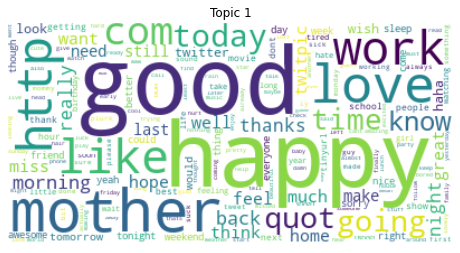

In [ ]:
from wordcloud import WordCloud
cloud1= WordCloud(background_color="white", max_words=500)
cloud1.generate_from_frequencies(topic_content[0])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud1, interpolation="bilinear")
plt.title("Topic 1")
plt.axis("off")
plt.show()

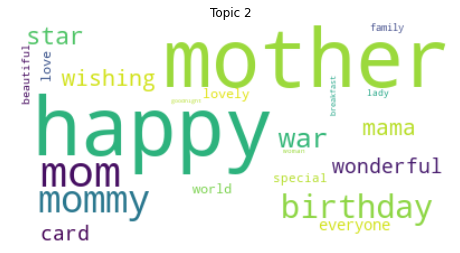

In [ ]:

cloud2= WordCloud(background_color="white", max_words=500)
cloud2.generate_from_frequencies(topic_content[1])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud2, interpolation="bilinear")
plt.title("Topic 2")
plt.axis("off")
plt.show()

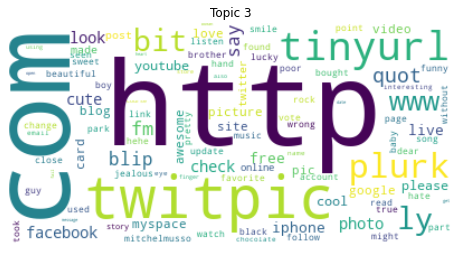

In [ ]:

cloud3= WordCloud(background_color="white", max_words=500)
cloud3.generate_from_frequencies(topic_content[2])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud3, interpolation="bilinear")
plt.title("Topic 3")
plt.axis("off")
plt.show()

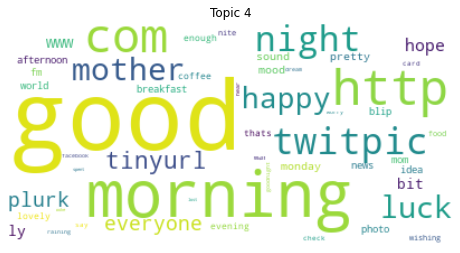

In [ ]:

cloud4= WordCloud(background_color="white", max_words=500)
cloud4.generate_from_frequencies(topic_content[3])

fig = plt.figure(1, figsize=(8,8))
plt.imshow(cloud4, interpolation="bilinear")
plt.title("Topic 4")
plt.axis("off")
plt.show()

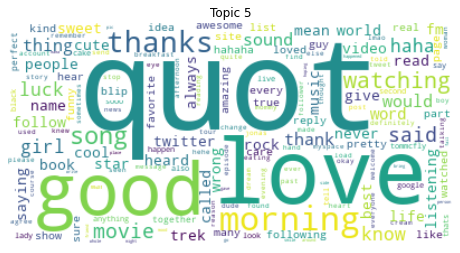

In [ ]:
cloud5= WordCloud(background_color="white", max_words=500)
cloud5.generate_from_frequencies(topic_content[4])

fig = plt.figure(1, figsize=(8,8))
plt.imshow(cloud5, interpolation="bilinear")
plt.title("Topic 5")
plt.axis("off")
plt.show()

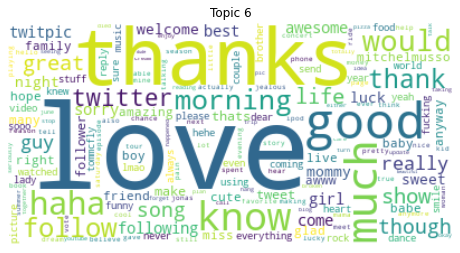

In [ ]:
cloud6= WordCloud(background_color="white", max_words=500)
cloud6.generate_from_frequencies(topic_content[5])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud6, interpolation="bilinear")
plt.title("Topic 6")
plt.axis("off")
plt.show()

**LDA**

In [ ]:
text = data['preprocessed_text'].apply(lambda x:word_tokenize(x))

In [ ]:
dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(i) for i in text]

In [ ]:
ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, 
                                    num_topics=6, passes=5, minimum_probability=0)

In [ ]:
ldamodel.print_topics()

[(0,
  '0.052*"quot" + 0.014*"http" + 0.011*"made" + 0.010*"love" + 0.009*"star" + 0.009*"world" + 0.007*"family" + 0.006*"trek" + 0.006*"welcome" + 0.005*"twitter"'),
 (1,
  '0.044*"mother" + 0.043*"happy" + 0.021*"good" + 0.013*"night" + 0.013*"love" + 0.012*"time" + 0.011*"great" + 0.011*"know" + 0.009*"morning" + 0.008*"would"'),
 (2,
  '0.014*"week" + 0.009*"mom" + 0.008*"mommy" + 0.008*"good" + 0.007*"watch" + 0.007*"next" + 0.006*"need" + 0.006*"music" + 0.006*"movie" + 0.006*"book"'),
 (3,
  '0.030*"thanks" + 0.020*"love" + 0.017*"http" + 0.012*"twitter" + 0.008*"good" + 0.008*"song" + 0.007*"like" + 0.007*"follow" + 0.007*"looking" + 0.006*"look"'),
 (4,
  '0.013*"thank" + 0.013*"sleep" + 0.012*"back" + 0.010*"home" + 0.010*"http" + 0.009*"hope" + 0.009*"time" + 0.009*"everyone" + 0.008*"finally" + 0.008*"well"'),
 (5,
  '0.019*"like" + 0.015*"really" + 0.013*"going" + 0.012*"good" + 0.010*"today" + 0.007*"sound" + 0.007*"getting" + 0.007*"nice" + 0.007*"ready" + 0.007*"back"'

In [ ]:
num = np.array([[y for (x,y) in ldamodel[corpus[i]]] for i in range(len(corpus))])
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(num)

topic = np.argmax(num, axis=1)

output_notebook()
n = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
fig = figure(title="t-SNE Clustering of {} LDA Topics".format(n), 
              plot_width=500, plot_height=500)
fig.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic])
show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.040s...
[t-SNE] Computed neighbors for 40000 samples in 1.754s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sam

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.873238
[t-SNE] KL divergence after 1000 iterations: 1.360038


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 65.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e59b37e6ca2311c63826dafc78240a6d4232c70df5d7f429eda3a9a0c321e441
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompat

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
print(ldamodel.print_topics(num_topics=6, num_words=3))

[(0, '0.052*"quot" + 0.014*"http" + 0.011*"made"'), (1, '0.044*"mother" + 0.043*"happy" + 0.021*"good"'), (2, '0.014*"week" + 0.009*"mom" + 0.008*"mommy"'), (3, '0.030*"thanks" + 0.020*"love" + 0.017*"http"'), (4, '0.013*"thank" + 0.013*"sleep" + 0.012*"back"'), (5, '0.019*"like" + 0.015*"really" + 0.013*"going"')]


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
!pip install pandas==1.3.1

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = pyLDAvis.gensim_models.prepare(ldamodel,corpus, dictionary)

TypeError: ignored

In [ ]:
lda_viz